In [110]:
import os
import tqdm
import torch
import torchvision
import torchsummary
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

### Auto Encoder Model

In [111]:
class autoencoder(torch.nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28*28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, latent_dim)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(latent_dim, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28*28),
            torch.nn.Tanh()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



#### Training

In [112]:
def training(name, dataloader, latent_dim, device, learning_rate, epochs):
    model = autoencoder(latent_dim).to(device)
    optim = torch.optim.Adam(model.parameters(), lr=learning_rate)
    metric1 = torch.nn.L1Loss()
    metric2 = torch.nn.MSELoss()

    print(f"Dataset: {name}, Latent Dimension: {latent_dim}")

    for epoch in range(epochs):
        for data, label in dataloader:
            input = data.view(-1, 28*28).to(device)
            output = model(input)
            loss1 = metric1(output, input)
            loss2 = metric2(output, input)

            optim.zero_grad()
            loss2.backward()
            optim.step()
        # print L1Loss and MSELoss when training
        print(f"Epoch: [{epoch+1}/{epochs}], L1Loss: [{loss1:.4f}], MSELoss: [{loss2:.4f}]")
    
    # print 16 images in 4x4 grids at last epoch of training
    img = output.reshape(-1, 1, 28, 28) 
    img_grid = torchvision.utils.make_grid(img[:16], nrow=4, normalize=True)
    plt.imshow(img_grid.permute(1, 2, 0).cpu().data.numpy())
    plt.show()
        
    # Save model
    torch.save(model, f"{name}_{latent_dim}.pth")
        

### Testing

In [113]:
def testing(name, dataloader, latent_dim, device):
    model = torch.load(f"{name}_{latent_dim}.pth").to(device)
    model.eval()
    metric1 = torch.nn.L1Loss()
    metric2 = torch.nn.MSELoss()
    loss1 = 0
    loss2 = 0

    print(f"Test Dataset: {name}, Latent Dimension: {latent_dim}")
    with torch.no_grad():
        for data, label in dataloader:
            input = data.view(-1, 28*28).to(device)
            output = model(input)
            loss1 += metric1(output, input)
            loss2 += metric2(output, input)
              
        print(f"L1Loss: [{loss1/len(dataloader):.4f}], MSELoss: [{loss2/len(dataloader):.4f}]")
        img = output.reshape(-1, 1, 28, 28) 
        img_grid = torchvision.utils.make_grid(img[:16], nrow=4, normalize=True)
        plt.imshow(img_grid.permute(1, 2, 0).cpu().data.numpy())
        plt.show()
            

### Main Function

Training... 
Dataset: MNIST, Latent Dimension: 64
Epoch: [1/10], L1Loss: [0.0886], MSELoss: [0.0626]
Epoch: [2/10], L1Loss: [0.0804], MSELoss: [0.0528]
Epoch: [3/10], L1Loss: [0.0699], MSELoss: [0.0444]
Epoch: [4/10], L1Loss: [0.0790], MSELoss: [0.0530]
Epoch: [5/10], L1Loss: [0.0729], MSELoss: [0.0484]
Epoch: [6/10], L1Loss: [0.0758], MSELoss: [0.0498]
Epoch: [7/10], L1Loss: [0.0677], MSELoss: [0.0431]
Epoch: [8/10], L1Loss: [0.0714], MSELoss: [0.0476]
Epoch: [9/10], L1Loss: [0.0738], MSELoss: [0.0486]
Epoch: [10/10], L1Loss: [0.0729], MSELoss: [0.0465]


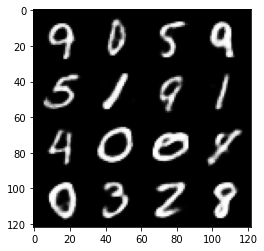

Dataset: MNIST, Latent Dimension: 32
Epoch: [1/10], L1Loss: [0.0857], MSELoss: [0.0616]
Epoch: [2/10], L1Loss: [0.0762], MSELoss: [0.0506]
Epoch: [3/10], L1Loss: [0.0678], MSELoss: [0.0423]
Epoch: [4/10], L1Loss: [0.0702], MSELoss: [0.0450]
Epoch: [5/10], L1Loss: [0.0710], MSELoss: [0.0436]
Epoch: [6/10], L1Loss: [0.0651], MSELoss: [0.0384]
Epoch: [7/10], L1Loss: [0.0630], MSELoss: [0.0367]
Epoch: [8/10], L1Loss: [0.0647], MSELoss: [0.0413]
Epoch: [9/10], L1Loss: [0.0659], MSELoss: [0.0387]
Epoch: [10/10], L1Loss: [0.0648], MSELoss: [0.0387]


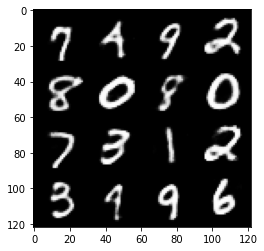

Dataset: MNIST, Latent Dimension: 4
Epoch: [1/10], L1Loss: [0.1641], MSELoss: [0.1295]
Epoch: [2/10], L1Loss: [0.1629], MSELoss: [0.1329]
Epoch: [3/10], L1Loss: [0.1649], MSELoss: [0.1371]
Epoch: [4/10], L1Loss: [0.1563], MSELoss: [0.1250]
Epoch: [5/10], L1Loss: [0.1618], MSELoss: [0.1347]
Epoch: [6/10], L1Loss: [0.1572], MSELoss: [0.1299]
Epoch: [7/10], L1Loss: [0.1584], MSELoss: [0.1294]
Epoch: [8/10], L1Loss: [0.1693], MSELoss: [0.1395]
Epoch: [9/10], L1Loss: [0.1512], MSELoss: [0.1255]
Epoch: [10/10], L1Loss: [0.1475], MSELoss: [0.1217]


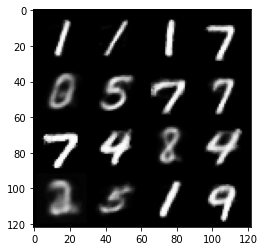

Dataset: FashionMNIST, Latent Dimension: 64
Epoch: [1/10], L1Loss: [0.1245], MSELoss: [0.0530]
Epoch: [2/10], L1Loss: [0.1269], MSELoss: [0.0533]
Epoch: [3/10], L1Loss: [0.1114], MSELoss: [0.0435]
Epoch: [4/10], L1Loss: [0.1180], MSELoss: [0.0469]
Epoch: [5/10], L1Loss: [0.1144], MSELoss: [0.0463]
Epoch: [6/10], L1Loss: [0.1129], MSELoss: [0.0449]
Epoch: [7/10], L1Loss: [0.1129], MSELoss: [0.0438]
Epoch: [8/10], L1Loss: [0.1080], MSELoss: [0.0414]
Epoch: [9/10], L1Loss: [0.1039], MSELoss: [0.0385]
Epoch: [10/10], L1Loss: [0.1118], MSELoss: [0.0449]


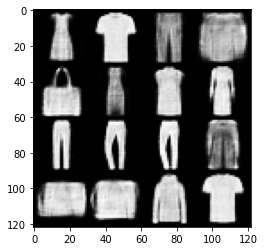

Dataset: FashionMNIST, Latent Dimension: 32
Epoch: [1/10], L1Loss: [0.1279], MSELoss: [0.0561]
Epoch: [2/10], L1Loss: [0.1246], MSELoss: [0.0526]
Epoch: [3/10], L1Loss: [0.1227], MSELoss: [0.0513]
Epoch: [4/10], L1Loss: [0.1150], MSELoss: [0.0446]
Epoch: [5/10], L1Loss: [0.1093], MSELoss: [0.0434]
Epoch: [6/10], L1Loss: [0.1111], MSELoss: [0.0427]
Epoch: [7/10], L1Loss: [0.1156], MSELoss: [0.0471]
Epoch: [8/10], L1Loss: [0.1105], MSELoss: [0.0413]
Epoch: [9/10], L1Loss: [0.1151], MSELoss: [0.0467]
Epoch: [10/10], L1Loss: [0.1143], MSELoss: [0.0464]


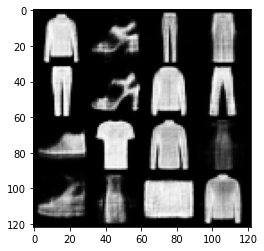

Dataset: FashionMNIST, Latent Dimension: 4
Epoch: [1/10], L1Loss: [0.1823], MSELoss: [0.0962]
Epoch: [2/10], L1Loss: [0.1596], MSELoss: [0.0839]
Epoch: [3/10], L1Loss: [0.1634], MSELoss: [0.0876]
Epoch: [4/10], L1Loss: [0.1553], MSELoss: [0.0865]
Epoch: [5/10], L1Loss: [0.1655], MSELoss: [0.0891]
Epoch: [6/10], L1Loss: [0.1591], MSELoss: [0.0850]
Epoch: [7/10], L1Loss: [0.1473], MSELoss: [0.0772]
Epoch: [8/10], L1Loss: [0.1523], MSELoss: [0.0821]
Epoch: [9/10], L1Loss: [0.1587], MSELoss: [0.0867]
Epoch: [10/10], L1Loss: [0.1444], MSELoss: [0.0734]


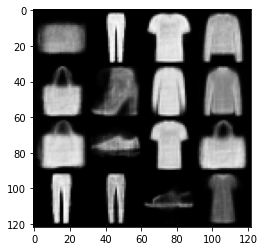

Testing... 
Test Dataset: MNIST, Latent Dimension: 64
L1Loss: [0.0695], MSELoss: [0.0457]


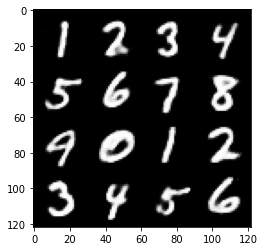

Test Dataset: MNIST, Latent Dimension: 32
L1Loss: [0.0642], MSELoss: [0.0383]


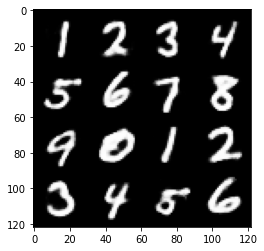

Test Dataset: MNIST, Latent Dimension: 4
L1Loss: [0.1573], MSELoss: [0.1301]


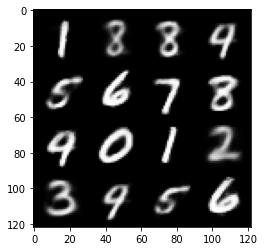

Test Dataset: FashionMNIST, Latent Dimension: 64
L1Loss: [0.1123], MSELoss: [0.0443]


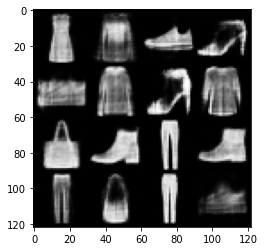

Test Dataset: FashionMNIST, Latent Dimension: 32
L1Loss: [0.1130], MSELoss: [0.0463]


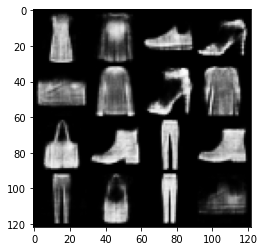

Test Dataset: FashionMNIST, Latent Dimension: 4
L1Loss: [0.1567], MSELoss: [0.0843]


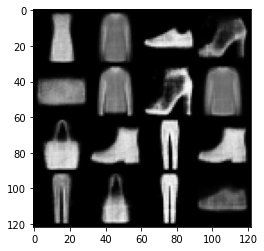

In [114]:
if __name__ == '__main__':
    # make two dir to save mnist and fashionmnit data
    os.makedirs("MNIST_dataset", exist_ok=True)
    os.makedirs("FashionMNIST_dataset", exist_ok=True)
    
    # dataset transform
    transform = torchvision.transforms.Compose([
        # transforms.Resize((28, 28)), 
        torchvision.transforms.ToTensor(), 
        torchvision.transforms.Normalize((0.5,), (0.5,))
        ])

    # download two train and two test dataset: 1. MNIST, 2. FashionMNIST
    MNIST_dataset = torchvision.datasets.MNIST(root="MNIST_dataset", transform=transform, download=True)
    FashionMNIST_dataset = torchvision.datasets.FashionMNIST(root="FashionMNIST_dataset", transform=transform, download=True)
    MNIST_test = torchvision.datasets.MNIST(root="MNIST_dataset", transform=transform, download=True, train=False)
    FashionMNIST_test = torchvision.datasets.FashionMNIST(root="FashionMNIST_dataset", transform=transform, download=True, train=False)
    
    # dataloader batch size
    batch_size = 128

    # dataset to DataLoader
    MNIST_dataloader = DataLoader(MNIST_dataset, batch_size, True)
    FashionMNIST_dataloader = DataLoader(FashionMNIST_dataset, batch_size, True)
    MNIST_testloader = DataLoader(MNIST_test, batch_size, False)
    FashionMNIST_testloader = DataLoader(FashionMNIST_test, batch_size, False)

    # using gpu
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    # others hyperparameters
    epochs = 10
    learning_rate = 0.008

    # Train
    print("Training... ")
    # MNIST for different latent
    latent_dims = [64, 32, 4]
    for latent_dim in latent_dims:
        training("MNIST", MNIST_dataloader, latent_dim, 
                device, learning_rate, epochs)

    # FashionMNIST for different latent
    for latent_dim in latent_dims:
        training("FashionMNIST", FashionMNIST_dataloader, latent_dim, 
                device, learning_rate, epochs)

    # Test
    print("Testing... ")
    # test DataLoader
    # MNIST for different latent
    for latent_dim in latent_dims:
        testing("MNIST", MNIST_testloader, latent_dim, device)

    # FashionMNIST for different latent
    for latent_dim in latent_dims:
        testing("FashionMNIST", FashionMNIST_testloader, latent_dim, device)

    